### Cold Start Problem

In this notebook, you will get more practice with evaluation methods as a continuation of the previous notebook.  You will also see what happens when you meet the cold start problem face to face.  And, we will consider some methods to handle the cold start problem.

With that, run the cell below to read in the ratings data, and let's get started!

In [1]:
# run this cell to read in the libraries and data needed
import numpy as np
import pandas as pd
import turicreate as tc

ratings_dat = pd.read_csv('../../../data/ratings.dat', sep='::', engine='python', \
                          header=None, names=['user_id', 'movie_id','rating','time'])

ratings_dat2 = ratings_dat.copy(deep=True)
ratings_dat2.columns = ['user_id', 'item_id', 'rating', 'time']
ratings_sframe = tc.SFrame(ratings_dat2[['user_id', 'item_id', 'rating']])

ratings_sframe.head()

user_id,item_id,rating
1,8722346,8
2,1502397,7
3,10526632,8
3,3513548,8
3,4082596,8
3,4658808,8
3,5073642,7
3,7876510,9
3,8075192,9
3,8652728,8


You've had the opportunity to fit a few different recommendation systems.  Now is your chance to put what you learned to practice.  Use the below prompts (and code from earlier in this course) to split your data and fit a few different models to be considered when making a recommendation.

**First,** create train and test datasets from the original data.  Set the `max_num_users` to `None` in order to maximize the test set.

In [2]:
train, test = tc.recommender.util.random_split_by_user(ratings_sframe, 
                                                       user_id = 'user_id',
                                                       item_id = 'item_id',
                                                       max_num_users=None)

**Now** using your `target = rating`, `create` two recommendation systems: a `factorization_recommender` and a `popularity_recommender`. You should only be creating your recommender using the `train` data.

In [3]:
model_factorization = tc.factorization_recommender.create(train, target='rating')
model_popular = tc.popularity_recommender.create(train, target='rating')

Preparing data set.

Data has 7138 observations with 2967 users and 1704 items.

Data prepared in: 0.01648s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 8        |

| regularization                 | L2 Regularization on Factors                     | 1e-08    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-10    |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 7138 / 7138 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | No Decrease (15.2176 >= 3.07871)         |

| 4       | 0.0976562         | 0.909095                                 |

| 5       | 0.0488281         | 1.29483                                  |

| 6       | 0.0244141         | 1.63818                                  |

| 7       | 0.012207          | 1.95827                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0976562         | 0.909095                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 144us        | 3.07871           | 1.75463               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 100.618ms    | 2.5464            | 1.59574               | 0.0976562   |

| 2       | 197.365ms    | 1.5885            | 1.26035               | 0.0580668   |

| 3       | 295.821ms    | 1.31216           | 1.1455                | 0.042841    |

| 4       | 391.818ms    | 1.17909           | 1.08586               | 0.0345267   |

| 5       | 496.05ms     | 1.07761           | 1.03808               | 0.029206    |

| 10      | 973.912ms    | 0.587916          | 0.766755              | 0.017366    |

| 50      | 5.17s        | 0.0981061         | 0.313202              | 0.00519365  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.093104

Final training RMSE: 0.305113

Preparing data set.

Data has 7138 observations with 2967 users and 1704 items.

Data prepared in: 0.016193s

7138 observations to process; with 1704 unique items.

Make **3** `recommend`ations for each of the users in `users_test`, the `SFrame` created below using each of your two created recommendation systems.

In [4]:
users_test = tc.SFrame({'user_id': [1, 2, 8]})

# use recommend to make recommendations for users_test with each of your recommenders
factorization_results = model_factorization.recommend(users_test, k=3)
popular_results = model_popular.recommend(users_test, k=3)

In [5]:
factorization_results

user_id,item_id,score,rank
1,96895,10.60560869196632,1
1,119174,10.58571409205177,2
1,327597,10.350137700831677,3
2,96895,10.30675572300532,1
2,119174,10.287528218275096,2
2,327597,10.061629237180735,3
8,96895,11.787086249834086,1
8,119174,11.775392772203471,2
8,327597,11.536560060030009,3


What happens when you make recommendations for the `new_user` below with the `popular` recommender?  How about if you make a recommendation using the `factorization` recommender?

In [6]:
new_user = tc.SFrame({'user_id': [0]})

# use recommend to make recommendations for users_test with each of your recommenders
fact_new_results = model_factorization.recommend(new_user, k=3)
pop_new_results = model_popular.recommend(new_user, k=3)

In [7]:
fact_new_results

user_id,item_id,score,rank
0,96895,10.663101316934611,1
0,119174,10.651172520166423,2
0,327597,10.412441374307658,3


In [8]:
pop_new_results

user_id,item_id,score,rank
0,2910904,10.0,1
0,1638355,10.0,2
0,91129,10.0,3


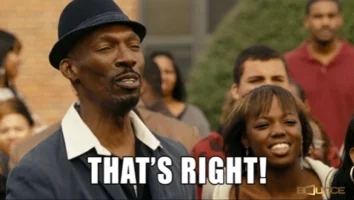

In [9]:
import solution_part2 as sp

a = "each of the recommenders has nan recommendations for the new user"
b = "both recommenders recommend the same, most popular recommendations"
c = "both recommenders give recommendations, but they don't match one another"
d = "None of the above"

your_answer = c

sp.answer_one(your_answer)

In [10]:
# run this cell to get some final thoughts before the next section
sp.final_thoughts()

One of the reasons turicreate is so popular is because of how well it handles a number of edge cases that show up when building recommendation systems from scratch, as you saw with the handling of this new user.  However, this still doesn't handle the edge case of a new item.  You can probably think of some ways you might recommend a new item to start getting ratings.
Next you'll look at an easy way to compare different recommendation systems, as well as how to store your system to be used later.
